# 画像処理応用レポート

In [86]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

## カラー画像とグレースケール画像の出力

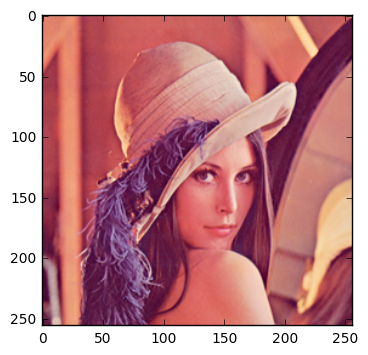

In [114]:
color_image = cv2.imread("Lenna.bmp")[:, :, ::-1] # OpenCV内でのRGBチャネルの順番にソート
plt.imshow(color_image)

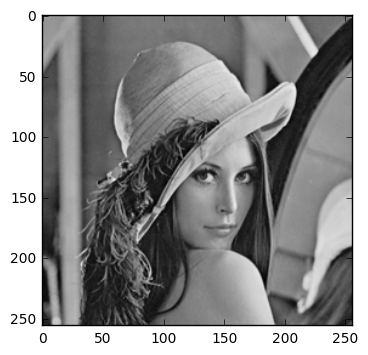

In [62]:
gray_image = cv2.imread("Lenna.bmp", cv2.IMREAD_GRAYSCALE) # グレーで読み込み
plt.imshow(gray_image)

## グレイスケール画像のヒストグラム

### 原画像の表示

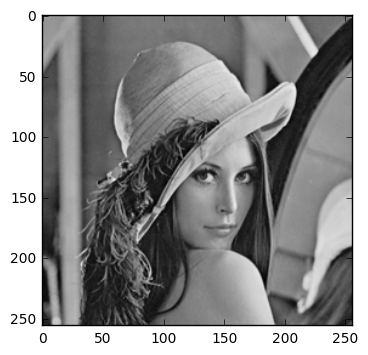

In [63]:
plt.imshow(gray_image)

### ヒストグラムの表示

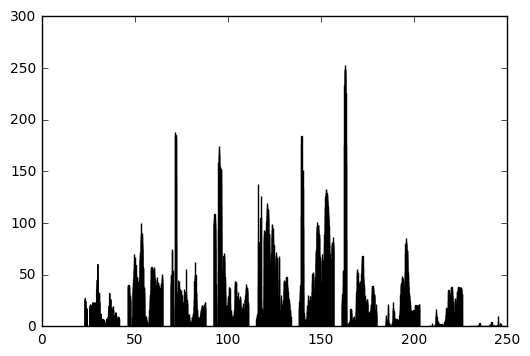

In [64]:
histogram = plt.hist(gray_image)

## コントラスト向上

### 元画像

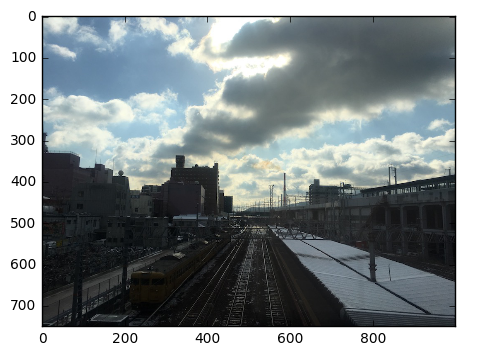

In [66]:
low_contrast_image = cv2.imread("tokuyama_station.JPG")[:, :, ::-1]
plt.imshow(low_contrast_image)

### ガンマ変換

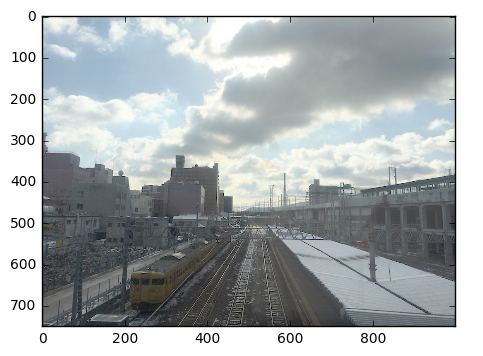

In [84]:
gamma = 2.0
max_val = low_contrast_image.max()

gamma_image = np.zeros_like(low_contrast_image)

for i in range(0, low_contrast_image.shape[2]): # 各チャネルごとにガンマ変換しないとうまく行かなかった
    gamma_image[:, :, i] = max_val * ( low_contrast_image[:, :, i] / max_val ) ** (1/gamma)

plt.imshow(gamma_image)

## 画像の回転

### 元画像

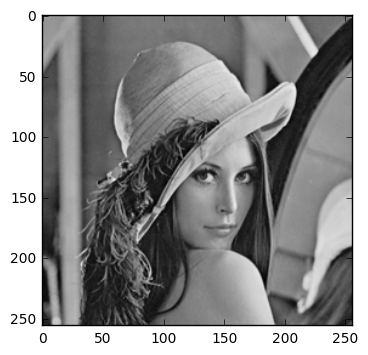

In [88]:
plt.imshow(gray_image)

### 回転処理

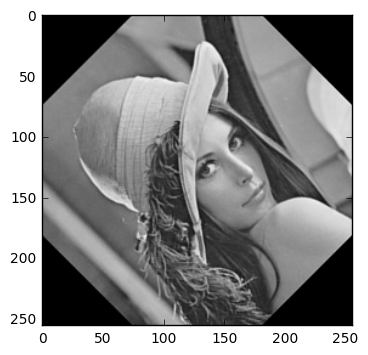

In [109]:
center = tuple(np.array([gray_image.shape[0]/2, gray_image.shape[1]/2])) # 画像の中心位置を求める
angle = 45.0 # 回転角度
scale = 1.0 # 拡大比率
rotation_mat = cv2.getRotationMatrix2D(center, angle, scale) # アフィン変換用行列の生成
rot_image = cv2.warpAffine(gray_image, rotation_mat, gray_image.shape, flags=cv2.INTER_CUBIC) # アフィン変換

plt.imshow(rot_image)

## ノイズ除去

### 元画像

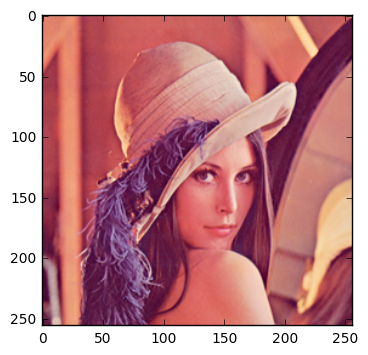

In [122]:
plt.imshow(color_image)

### Salt & Pepper Noise (1%) を適用

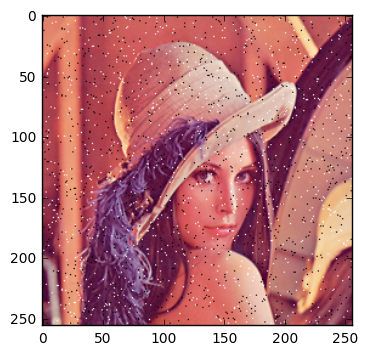

In [123]:
row,col,ch = color_image.shape
s_vs_p = 0.5
amount = 0.01
noise_image = color_image.copy()

num_salt = np.ceil(amount * color_image.size * s_vs_p)
coords = [np.random.randint(0, i-1 , int(num_salt)) for i in color_image.shape]
noise_image[coords[:-1]] = (255,255,255)

num_pepper = np.ceil(amount*  color_image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i-1 , int(num_pepper)) for i in  color_image.shape]
noise_image[coords[:-1]] = (0,0,0)

plt.imshow(noise_image)

### メディアンフィルタを適用

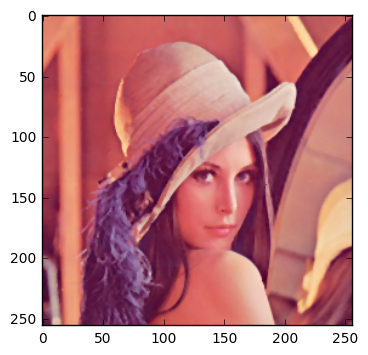

In [205]:
median_image = cv2.medianBlur(noise_image, ksize=3) # カーネルサイズ5のメディアンフィルタ
plt.imshow(median_image)

### バイラテラルフィルタ

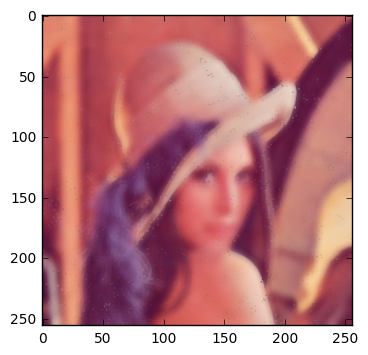

In [206]:
bilateral_image = cv2.bilateralFilter(noise_image, 11, 350, 10) # カーネルサイズ11, 色の標準偏差350, 距離の標準偏差10のバイラテラルフィルタ
plt.imshow(bilateral_image)

色の標準偏差（3番目の引数）を大きくしなければノイズが消えなかった

## エッジ検出のフィルタをかける

### Sobelフィルタ

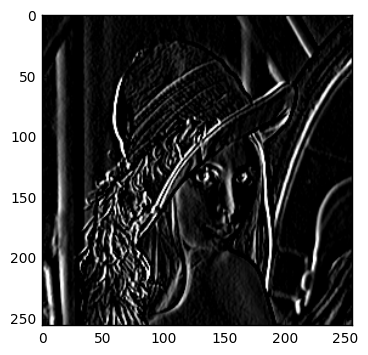

In [197]:
sobel_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # Sobelフィルタを定義
sobel_image = cv2.filter2D(gray_image, -1, sobel_filter)
plt.imshow(sobel_image)

### Cannyフィルタ

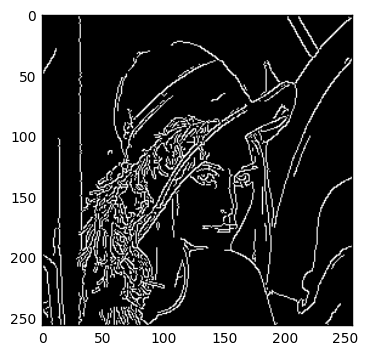

In [199]:
canny_image = cv2.Canny(gray_image, 100, 200) # しきい値処理における最小値が100、最大値が200のCannyフィルタ
plt.imshow(canny_image)

### Laplacianフィルタ

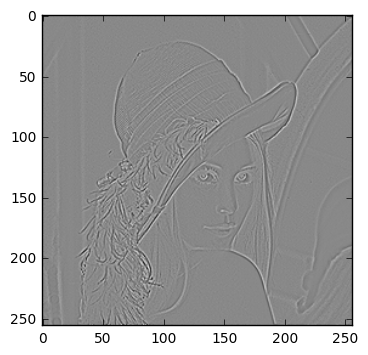

In [204]:
laplacian_image = cv2.Laplacian(gray_image, cv2.CV_32F, 5) # ビット深度32bit、カーネルサイズ5のLaplacianフィルタ
plt.imshow(laplacian_image)